**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

* NOMBRE: Carlos Alejandro Herrera Legaspi, MATRÍCULA: A01751709
* NOMBRE: Hesus García Cobos, MATRÍCULA: A01129778
* NOMBRE: Rafael Mandujano Núñez, MATRÍCULA: A00824644
* NOMBRE: Omar Aguilar Macedo, MATRÍCULA: A01797078


In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import os
# DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8/Actividad8_RLineal"
DIR = "/content/drive/MyDrive/TC4029/actividades/08"
os.chdir(DIR)

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [103]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [104]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [105]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [106]:
insurance_df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


1b) Búsqueda de valores faltantes.

In [107]:
insurance_df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

In [108]:
variables_numericas = insurance_df.describe().columns
variables_categoricas = insurance_df.describe(include='object').columns

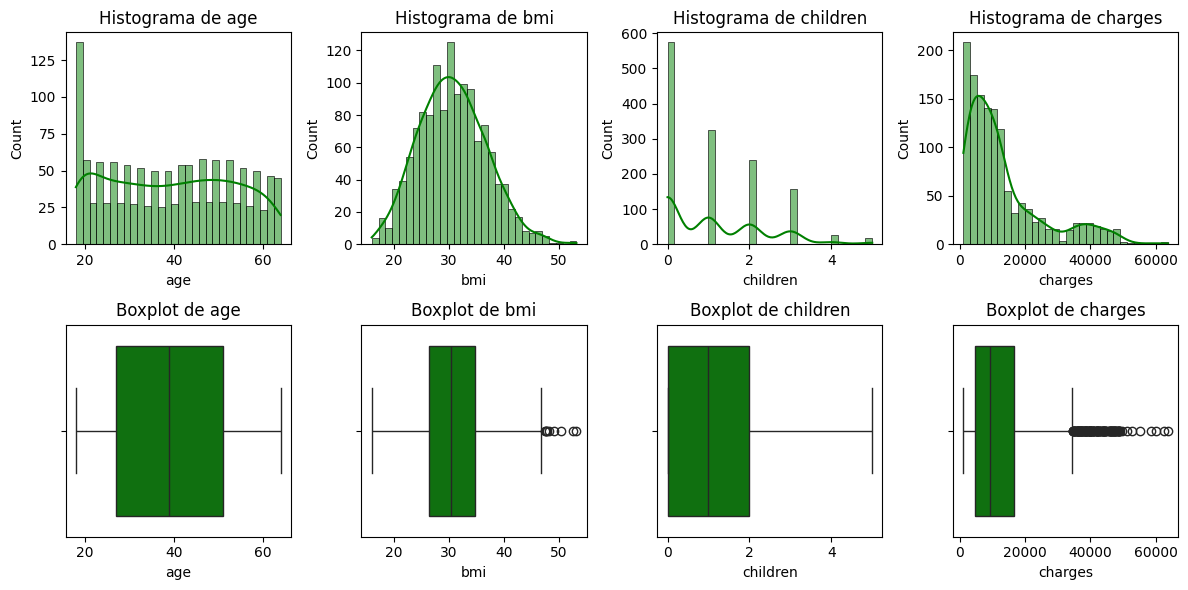

In [109]:
plt.figure(figsize=(12, 6))

for i, var in enumerate(variables_numericas):
    plt.subplot(2, len(variables_numericas), i+1)
    sns.histplot(insurance_df[var], kde=True, bins=30, color='green')
    plt.title(f"Histograma de {var}")

    plt.subplot(2, len(variables_numericas), i + 1 + len(variables_numericas))
    sns.boxplot(x=insurance_df[var], color='green')
    plt.title(f"Boxplot de {var}")

plt.tight_layout()
plt.show()

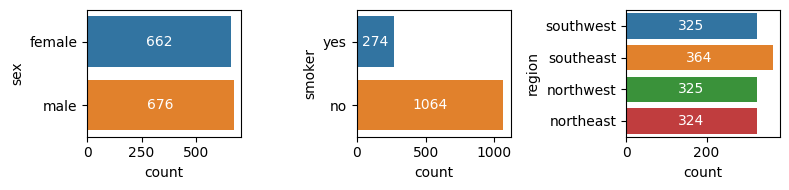

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(8, 2))
for ax, col in zip(axes.flatten(), variables_categoricas):
    sns.countplot(data=insurance_df, y=col, hue=col, ax=ax)
    for index, value in enumerate(insurance_df[col].value_counts(sort = False)):
      ax.text(
          value / 2,
          index,
          value,
          va = 'center',
          ha = 'center',
          color = 'white'
      )

plt.tight_layout()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

**RESPUESTA:**
- **Hay una diferencia algo marcada para los hombres en el Q3 llegando a ser primas con mayor valor**
- **Las mujeres tienen más outliers, lo que nos podría indicar que existen algunas primas extras por ser mujer, como podría ser asistencia al embarazo, etc.**

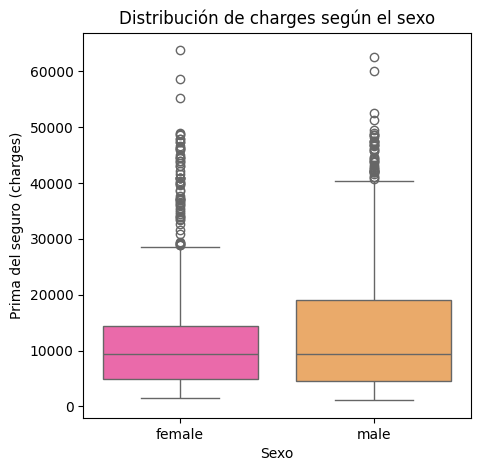

In [111]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=insurance_df, x="sex", y="charges", hue='sex', palette="spring")
plt.title("Distribución de charges según el sexo")
plt.xlabel("Sexo")
plt.ylabel("Prima del seguro (charges)")
plt.show()

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

**RESPUESTA**
- **Parece que el ser fumador conyeva un incremento en el precio de las pólizas**
- **El número de hijos parece no tener una relación directa con la prima**
- **Tener un mayor BMI también puede ser un indicador de una póliza más cara, aunque no en todos los casos**


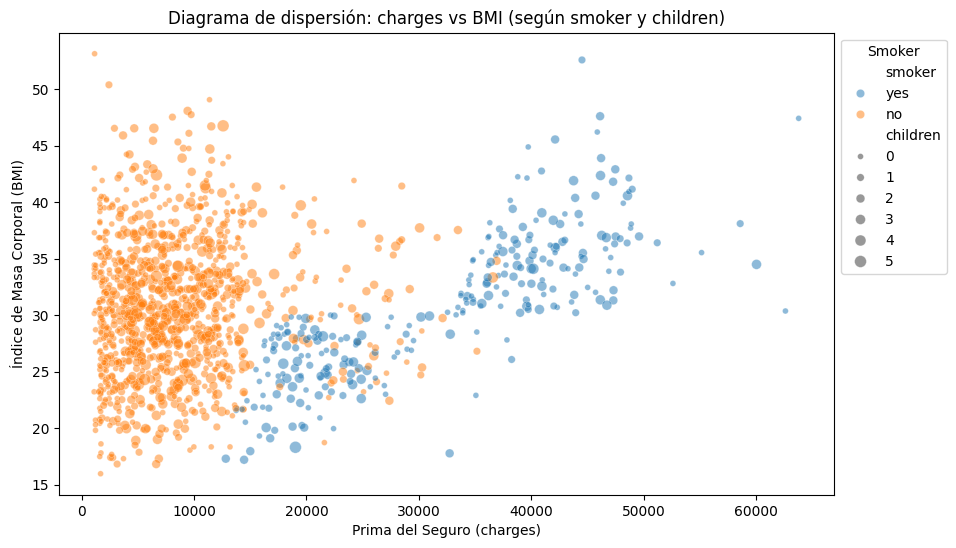

In [112]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=insurance_df,
    x="charges",
    y="bmi",
    hue="smoker",
    size="children",
    alpha=0.5
)

plt.title("Diagrama de dispersión: charges vs BMI (según smoker y children)")
plt.ylabel("Índice de Masa Corporal (BMI)")
plt.xlabel("Prima del Seguro (charges)")
plt.legend(title="Smoker", loc="upper left", bbox_to_anchor=(1,1))
plt.show()

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

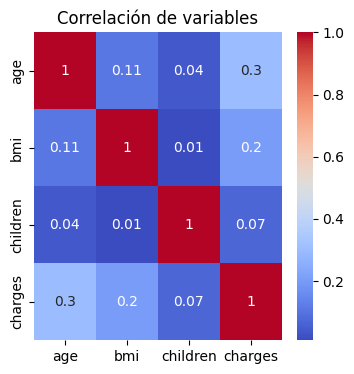

In [113]:
corr_mat = insurance_df.corr(numeric_only = True)
plt.figure(figsize=(4, 4))
sns.heatmap(round(corr_mat, 2), annot = True, cmap = 'coolwarm')
plt.title('Correlación de variables')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

**RESPUESTA**
- **Promedio de edad: 41.08**
- **Promedio de bmi: 35.56**


In [114]:
Q1 = insurance_df["charges"].quantile(0.25)
Q3 = insurance_df["charges"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_df = insurance_df[(insurance_df["charges"] < lower_bound) | (insurance_df["charges"] > upper_bound)]
outliers_df.head(3)

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [115]:
outliers_df[['age', 'bmi']].mean()

,0
age,41.079137
bmi,35.564604


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [116]:
sex_counts = outliers_df["sex"].value_counts(normalize=True) * 100
print(f"Porcentaje de mujeres en valores atípicos: {sex_counts.get('female', 0):.2f}%")
print(f"Porcentaje de hombres en valores atípicos: {sex_counts.get('male', 0):.2f}%")

Porcentaje de mujeres en valores atípicos: 35.97%
Porcentaje de hombres en valores atípicos: 64.03%


In [117]:
smoker_counts = outliers_df["smoker"].value_counts(normalize=True) * 100
print(f"Porcentaje de fumadores en valores atípicos: {smoker_counts.get('yes', 0):.2f}%")
print(f"Porcentaje de no fumadores en valores atípicos: {smoker_counts.get('no', 0):.2f}%")


Porcentaje de fumadores en valores atípicos: 97.84%
Porcentaje de no fumadores en valores atípicos: 2.16%


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [118]:
X = insurance_df.drop('charges', axis = 1)
y = insurance_df["charges"]
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [119]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1,
    stratify=X["smoker"]
)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño X_test: {X_test.shape}")
print(f"Tamaño y_train: {y_train.shape}")
print(f"Tamaño y_test: {y_test.shape}")

Tamaño de X_train: (1070, 6)
Tamaño X_test: (268, 6)
Tamaño y_train: (1070,)
Tamaño y_test: (268,)


6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [121]:
variables_numericas = X.describe().columns
variables_categoricas = X.describe(include='object').columns

preprocessing = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), variables_numericas),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), variables_categoricas)
    ])
preprocessing

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 Index(['age', 'bmi', 'children'], dtype='object')),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 Index(['sex', 'smoker', 'region'], dtype='object'))])

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [122]:
lr_model = make_pipeline(
    preprocessing,
    LinearRegression()
)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 5698.76
R²: 0.75


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [123]:
Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR

y_train_clipped = np.where(y_train > upper_bound, upper_bound, y_train)
y_test_clipped = np.where(y_test > upper_bound, upper_bound, y_test)

In [124]:
lr_model2 = make_pipeline(
    preprocessing,
    LinearRegression()
)
lr_model2.fit(X_train, y_train_clipped)

y_pred2 = lr_model2.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(y_test_clipped, y_pred2))
r2_2 = r2_score(y_test_clipped, y_pred2)

print(f"RMSE: {rmse2:.2f}")
print(f"R²: {r2_2:.2f}")

RMSE: 4995.03
R²: 0.76


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [125]:
preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),
        ('cat', OrdinalEncoder(), variables_categoricas)
    ])
preprocessing2

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['age', 'bmi', 'children'], dtype='object')),
                                ('cat', OrdinalEncoder(),
                                 Index(['sex', 'smoker', 'region'], dtype='object'))])

In [126]:
lr_model3 = make_pipeline(
   preprocessing2,
   LinearRegression()
)
lr_model3.fit(X_train, y_train_clipped)

y_pred3 = lr_model2.predict(X_test)
rmse3 = np.sqrt(mean_squared_error(y_test_clipped, y_pred3))
r2_3 = r2_score(y_test_clipped, y_pred3)

print(f"RMSE: {rmse3:.2f}")
print(f"R²: {r2_3:.2f}")

RMSE: 4995.03
R²: 0.76


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [127]:
best_rmse = float('inf')
best_model_info = None

for degree in range(2, 6):
  pipeline = make_pipeline(
      preprocessing,
      PolynomialFeatures(degree=degree, include_bias=False),
      LinearRegression()
  )
  pipeline.fit(X_train, y_train_clipped)

  y_pred = pipeline.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test_clipped, y_pred))
  r2 = r2_score(y_test_clipped, y_pred)
  print(f"Grado {degree}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
  if rmse < best_rmse:
    best_rmse = rmse
    best_model_info = (degree, rmse, r2, pipeline)

degree, rmse4, r2_4, lr_model4 = best_model_info
print("-"*10)
print(f"Mejor Grado de Polinomio: {degree}")
print(f"RMSE: {rmse4:.2f}")
print(f"R²: {r2_4:.2f}")

lr_model4

Grado 2, RMSE: 4412.05, R²: 0.81
Grado 3, RMSE: 4523.85, R²: 0.80
Grado 4, RMSE: 5702.83, R²: 0.69
Grado 5, RMSE: 13539.67, R²: -0.76
----------
Mejor Grado de Polinomio: 2
RMSE: 4412.05
R²: 0.81


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['age', 'bmi', 'children'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])